# Notebook 2
## COMP30760 — Assignment 1  
## Charlie Zhang - 23341901

## 2. Data Preparation and Analysis

- In your second notebook, load the saved dataset from Task 1 into an appropriate data structure for use as an Analytics Base Table.
- Apply any data preprocessing steps that might be required to clean, filter or transform the ABT before analysis. Use Markdown cells to explain and justify each preprocessing step.
- Analyse, characterise, and summarise the cleaned ABT, using visualisations where appropriate. Use Markdown cells to explain each step and interpret the results.


In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

Start by loading in raw data set from the cars_dataset.json created from notebook 1

In [2]:
# load the data set from the cars_dataset.json into the data frame
car_data = "cars_dataset.json"
car_df = pd.read_json(car_data)

# print off data to get a visual
print("Amount of rows: ", len(car_df)) # compare with notebook 1 amount of rows to ensure all is imported
print("Columns:", list(car_df.columns)) # see what the columns title is

display(car_df.head(10))  


Amount of rows:  1654
Columns: ['Sale Price', 'Date of Sale', 'Year', 'Mileage', 'Classification', 'Transmission', 'Fuel Type', 'Description', 'Sale Location', 'Title', 'Make']


,Sale Price,Date of Sale,Year,Mileage,Classification,Transmission,Fuel Type,Description,Sale Location,Title,Make
0,"€ 41,241",03/01/2024,2019,29431,SUV,Automatic,Diesel,Red Audi Q7. S line 50 TDI quattro 286 PS tipt...,Wexford,Audi Q7 (TDI V6),Audi
1,"€ 18,635",06/01/2024,2014,46283,Convertible,Automatic,Petrol,Red Audi TTS. 2.0 TFSI Limited Edition Roadste...,Carlow,Audi TTS (Limited Edition),Audi
2,"€37,132.00",06/01/2024,2019,34976,Saloon,Automatic,Diesel,Audi A4. S4 Black Edition 3.0 4dr,Dublin,Audi S4 (TDI V6),Audi
3,"€31,521.00",2024-01-08,2020,"26,639 miles",Saloon,Automatic,Diesel,Blue Audi A6 DIESEL SALOON. 40 TDI Quattro S L...,Westmeath,Audi A6 Saloon (S line),Audi
4,"€107,264.00",09/01/2024,2021,4247,Estate,Automatic,Petrol,Audi RS6. RS 6 Avant Vorsprung 600 PS tiptroni...,Kilkenny,Audi RS6 Avant (TFSI V8),Audi
5,"€16,885.00",09/01/2024,2015,80582,Estate,Automatic,Diesel,Black Audi A6 Avant. 2.0 TDI ultra Black Editi...,Dublin,Audi A6 Avant (ultra),Audi
6,"€22,119.00",09/01/2024,2019,"17,572 miles",Saloon,Automatic,Diesel,Audi A4. Sport 35 TDI 150 PS S tronic 2.0 4dr,Dublin,Audi A4 (TDI),Audi
7,"€32,190.00",2024-01-12,2017,60246,SUV,Automatic,Diesel,Black Audi Q7. 3.0 TDI V6 S line Tiptronic qua...,Kerry,Audi Q7 (S line),Audi
8,"€21,839.00",13/01/2024,2017,46462,SUV,Automatic,Petrol,Blue Audi Q3. 1.4 TFSI CoD S line Edition S Tr...,Dublin,Audi Q3 (S line Edition),Audi
9,"€26,266.00",14/01/2024,2019,46443,SUV,Automatic,Petrol,Black Audi Q3. Sport 35 TFSI 150 PS S tronic 1...,Meath,Audi Q3 (CoD),Audi


Create a copy and clean up the data

In [3]:
# create a copy
abt = car_df.copy()

# goes through every column and cleans up all the whitespace in the data
for c in abt.columns:
    if abt[c].dtype == "object":
        abt[c] = abt[c].astype(str).str.strip()

Print out the Makes visualy to see if theyre any errors or outliers

In [4]:
print(sorted(abt["Make"].dropna().unique().tolist()))

['Audi', 'BMW', 'Mercedes-Benz', 'Volkswagen']


As they are no errors or outliers we can move on

Print out the Fuel Types visualy to see if theyre any errors or outliers

In [5]:
print(sorted(abt["Fuel Type"].dropna().unique().tolist()))
abt["Fuel Type"].value_counts(dropna=False)

['Diesel', 'Diesel Hybrid', 'Diesel Plug-In Hybrid', 'Electric', 'Petrol', 'Petrol Hybrid', 'Petrol Plug-In Hybrid']


Fuel Type
Diesel                   856
Petrol                   706
Electric                  27
Diesel Hybrid             26
Petrol Plug-In Hybrid     19
Petrol Hybrid             18
Diesel Plug-In Hybrid      2
Name: count, dtype: int64

Clean up the data to make it consistent e.g Diesel Plug-In Hybrid can be just Diesel Hybrid to allow them to group together. Same with Petrol Plug-In Hybrid. Created a column that shows the value of each to see if the cleaned up words correctly are put into their alocated spots. e.g diesel hybrid should go up by 2

In [6]:
if "Fuel Type" in abt.columns:
    abt["Fuel Type"] = abt["Fuel Type"].astype(str).str.strip().str.title()
    fix_word = {
        "Diesel Plug-In Hybrid": "Diesel Hybrid", "Petrol Plug-In Hybrid": "Petrol Hybrid"
    }
    
abt["Fuel Type"] = abt["Fuel Type"].replace(fix_word)
abt["Fuel Type"].value_counts(dropna=False)


Fuel Type
Diesel           856
Petrol           706
Petrol Hybrid     37
Diesel Hybrid     28
Electric          27
Name: count, dtype: int64

Print out the Sale Location visualy to see if theyre any errors or outliers

In [7]:
print(sorted(abt["Sale Location"].dropna().unique().tolist()))

['Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Galway', 'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim', 'Limerick', 'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan', 'Offaly', 'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Westmeath', 'Wexford', 'Wicklow']


As we know that the Make is the first word in the title, we then make the model everyword after the first in the title.

In [8]:
if "Title" in abt.columns:
    title_tokens = abt["Title"].astype(str).str.split()
    abt["Model"] = title_tokens.str[1:].str.join(" ").str.strip()
    abt.loc[abt["Model"] == "", "Model"] = pd.NA
else:
    abt["Model"] = pd.NA

Print out the Transmission types visualy to see if theyre any errors or outliers

In [9]:
if "Transmission" in abt.columns:
    abt["Transmission"] = abt["Transmission"].str.title()
    
print(sorted(abt["Transmission"].dropna().unique().tolist()))
print(abt["Transmission"].value_counts(dropna=False).to_string())


['Auto', 'Automatic', 'Manual']
Transmission
Automatic    1092
Manual        514
Auto           48


Change Auto to be the same as Automatic to ensure standardisation

In [29]:
if "Transmission" in abt.columns:
    abt["Transmission"] = abt["Transmission"].astype(str).str.strip().str.title()
    fix_word = {
        "Auto": "Automatic"
    }
print(sorted(abt["Transmission"].dropna().unique().tolist()))
abt["Transmission"] = abt["Transmission"].replace(fix_word)
abt["Transmission"].value_counts(dropna=False)


['Automatic', 'Manual']


Transmission
Automatic    1140
Manual        514
Name: count, dtype: int64

Clean up the Sale Price column to make it consistent, remove the € sign, commas and empty spaces. If a value is missing it print out NaN instead. This make the prices more consise and sortable. 

In [11]:
if "Sale Price" in abt.columns:
    s = abt["Sale Price"].astype(str)
    s = s.str.replace("€", "", regex=False)
    s = s.str.replace(",", "", regex=False)
    s = s.str.replace(" ", "", regex=False)
    s = s.replace({"": np.nan})
    abt["Sale Price"] = pd.to_numeric(s, errors="coerce").astype("Int64") 


Clean up the Mileage column to make it consistent, remove the commas and empty spaces. Some data entries have the words miles in it and mile, if it does remove them.
If a value is missing it print out NaN instead. This make the prices more consise and sortable. 

In [12]:
if "Mileage" in abt.columns:
    m = abt["Mileage"].astype(str)
    m = m.str.replace(",", "", regex=False)
    m = m.str.replace(" miles", "", regex=False)
    m = m.str.replace("mile", "", regex=False)
    m = m.str.extract(r"(\d+)", expand=False)
    abt["Mileage"] = pd.to_numeric(m, errors="coerce")
    

Print out the Years visualy to see if theyre any errors or outliers

In [13]:
print(sorted(abt["Year"].dropna().unique().tolist()))


[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


Looking through the json file we can see there are some dates of sales in ISO formatting, we change it to UK/ Irish time formatt

In [14]:
# Date of Sale → EU (convert only ISO yyyy-mm-dd to dd/mm/YYYY)
if "Date of Sale" in abt.columns:
    s = abt["Date of Sale"].astype(str).str.strip()
    iso_mask = s.str.match(r"^\d{4}-\d{2}-\d{2}$", na=False)
    dos = s.copy()
    dos.loc[iso_mask] = pd.to_datetime(dos.loc[iso_mask], format="%Y-%m-%d", errors="coerce") \
                          .dt.strftime("%d/%m/%Y")
    abt["Date of Sale"] = dos
    
print(sorted(abt["Date of Sale"].dropna().unique().tolist()))

['01/02/2024', '01/03/2024', '01/04/2024', '01/05/2024', '01/06/2024', '01/07/2024', '01/08/2024', '01/09/2024', '01/10/2024', '01/11/2024', '01/12/2024', '02/01/2024', '02/02/2024', '02/03/2024', '02/04/2024', '02/05/2024', '02/06/2024', '02/07/2024', '02/08/2024', '02/09/2024', '02/10/2024', '02/11/2024', '02/12/2024', '03/01/2024', '03/02/2024', '03/03/2024', '03/04/2024', '03/05/2024', '03/06/2024', '03/07/2024', '03/08/2024', '03/09/2024', '03/10/2024', '03/11/2024', '03/12/2024', '04/01/2024', '04/02/2024', '04/03/2024', '04/04/2024', '04/05/2024', '04/06/2024', '04/07/2024', '04/08/2024', '04/09/2024', '04/10/2024', '04/11/2024', '04/12/2024', '05/01/2024', '05/02/2024', '05/03/2024', '05/04/2024', '05/05/2024', '05/06/2024', '05/07/2024', '05/08/2024', '05/09/2024', '05/10/2024', '05/11/2024', '05/12/2024', '06/01/2024', '06/02/2024', '06/03/2024', '06/04/2024', '06/05/2024', '06/06/2024', '06/07/2024', '06/08/2024', '06/09/2024', '06/10/2024', '06/11/2024', '06/12/2024', '07/0

Print out the Classifications of the cars types visualy to see if theyre any errors or outliers

In [15]:
if "Classification" in abt.columns:
    abt["Classification"] = abt["Classification"].astype(str).str.strip().str.title()

abt["Classification"].value_counts(dropna=False)



Classification
Hatchback      469
Suv            384
Saloon         368
Coupe          167
Estate         136
Convertible    104
S.U.V.          20
Estat            6
Name: count, dtype: int64

As SUV appears in many differnet formats and estat is spelt wrong we change S.U.V and suv into a standard SUV, we fix Estat also to be counted as Estate

In [16]:
if "Classification" in abt.columns:
    abt["Classification"] = abt["Classification"].astype(str).str.strip().str.title()
    fix_word = {
        "Estat": "Estate", "S.U.V.": "SUV", "Suv": "SUV"
    }
    abt["Classification"] = abt["Classification"].replace(fix_word)
abt["Classification"].value_counts(dropna=False)


Classification
Hatchback      469
SUV            404
Saloon         368
Coupe          167
Estate         142
Convertible    104
Name: count, dtype: int64

Looking through the data the description has colour in some of them, we find the first word in the data and if there isnt any colour the make appears, we remove the make

In [17]:
s = abt["Description"].astype("string").str.strip()
first = s.str.split().str[0]
first.value_counts(dropna=False)


Description
Blue             319
Black            318
Red              277
Grey             170
Silver           168
Navy             147
Mercedes-Benz     82
Audi              65
BMW               63
Volkswagen        45
Name: count, dtype: int64

In [18]:
brand_set = set(abt["Make"].dropna().str.upper().unique())
first = first.str.upper()

first = first.where(~first.isin(brand_set)).dropna()
first.value_counts(dropna=False)


Description
BLUE      319
BLACK     318
RED       277
GREY      170
SILVER    168
NAVY      147
Name: count, dtype: int64

Remove duplicates and print out examples of the information

In [19]:
abt = abt.drop_duplicates().copy() # remove duplicates

display(abt.head(10))

abt.to_json("cars_clean.json", orient="records", indent=2, force_ascii=False)
print("cars_clean.json") 


,Sale Price,Date of Sale,Year,Mileage,Classification,Transmission,Fuel Type,Description,Sale Location,Title,Make,Model
0,41241,03/01/2024,2019,29431,SUV,Automatic,Diesel,Red Audi Q7. S line 50 TDI quattro 286 PS tipt...,Wexford,Audi Q7 (TDI V6),Audi,Q7 (TDI V6)
1,18635,06/01/2024,2014,46283,Convertible,Automatic,Petrol,Red Audi TTS. 2.0 TFSI Limited Edition Roadste...,Carlow,Audi TTS (Limited Edition),Audi,TTS (Limited Edition)
2,37132,06/01/2024,2019,34976,Saloon,Automatic,Diesel,Audi A4. S4 Black Edition 3.0 4dr,Dublin,Audi S4 (TDI V6),Audi,S4 (TDI V6)
3,31521,08/01/2024,2020,26639,Saloon,Automatic,Diesel,Blue Audi A6 DIESEL SALOON. 40 TDI Quattro S L...,Westmeath,Audi A6 Saloon (S line),Audi,A6 Saloon (S line)
4,107264,09/01/2024,2021,4247,Estate,Automatic,Petrol,Audi RS6. RS 6 Avant Vorsprung 600 PS tiptroni...,Kilkenny,Audi RS6 Avant (TFSI V8),Audi,RS6 Avant (TFSI V8)
5,16885,09/01/2024,2015,80582,Estate,Automatic,Diesel,Black Audi A6 Avant. 2.0 TDI ultra Black Editi...,Dublin,Audi A6 Avant (ultra),Audi,A6 Avant (ultra)
6,22119,09/01/2024,2019,17572,Saloon,Automatic,Diesel,Audi A4. Sport 35 TDI 150 PS S tronic 2.0 4dr,Dublin,Audi A4 (TDI),Audi,A4 (TDI)
7,32190,12/01/2024,2017,60246,SUV,Automatic,Diesel,Black Audi Q7. 3.0 TDI V6 S line Tiptronic qua...,Kerry,Audi Q7 (S line),Audi,Q7 (S line)
8,21839,13/01/2024,2017,46462,SUV,Automatic,Petrol,Blue Audi Q3. 1.4 TFSI CoD S line Edition S Tr...,Dublin,Audi Q3 (S line Edition),Audi,Q3 (S line Edition)
9,26266,14/01/2024,2019,46443,SUV,Automatic,Petrol,Black Audi Q3. Sport 35 TFSI 150 PS S tronic 1...,Meath,Audi Q3 (CoD),Audi,Q3 (CoD)


cars_clean.json


Create many different charts and graphs in order to get analyse the data

In [20]:
import matplotlib.pyplot as plt

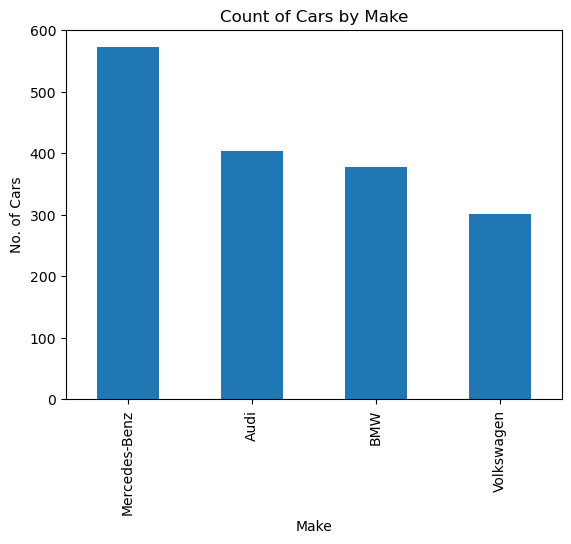

In [21]:
abt["Make"].value_counts().plot(kind="bar")
plt.title("Count of Cars by Make")
plt.xlabel("Make")
plt.ylabel("No. of Cars")
plt.show()


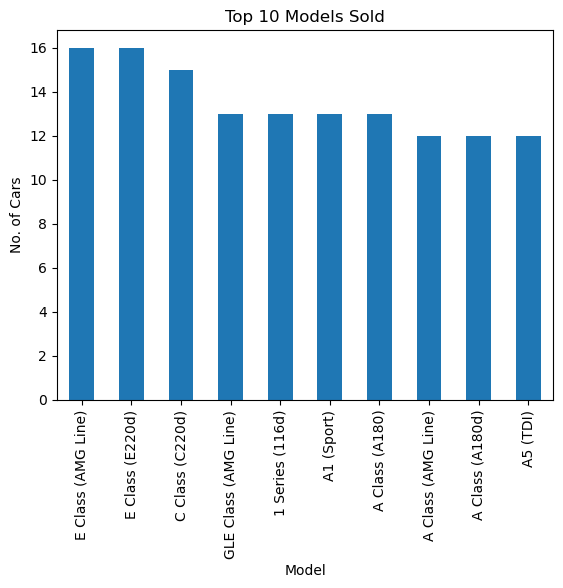

In [22]:
abt["Model"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Models Sold")
plt.xlabel("Model")
plt.ylabel("No. of Cars")
plt.show()


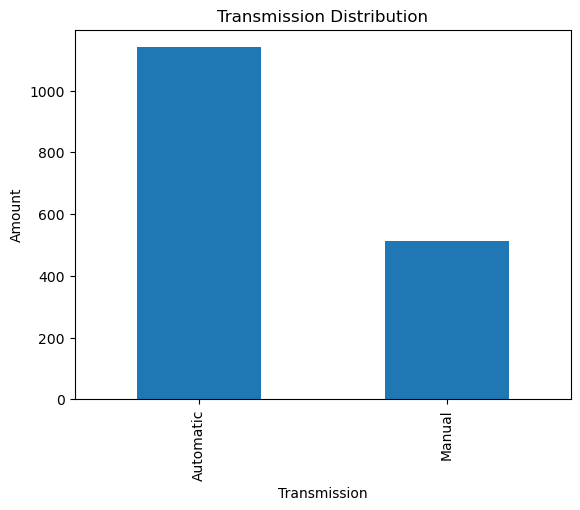

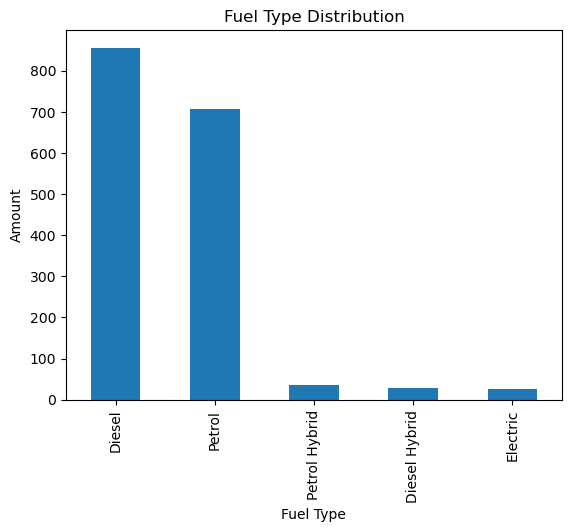

In [23]:
abt["Transmission"].value_counts().plot(kind="bar")
plt.title("Transmission Distribution")
plt.xlabel("Transmission")
plt.ylabel("Amount")
plt.show()

abt["Fuel Type"].value_counts().plot(kind="bar")
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Amount")
plt.show()


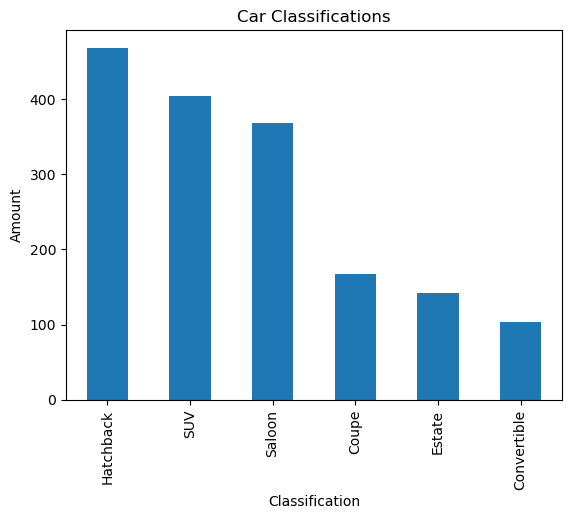

In [24]:
abt["Classification"].value_counts().plot(kind="bar")
plt.title("Car Classifications")
plt.xlabel("Classification")
plt.ylabel("Amount")
plt.show()


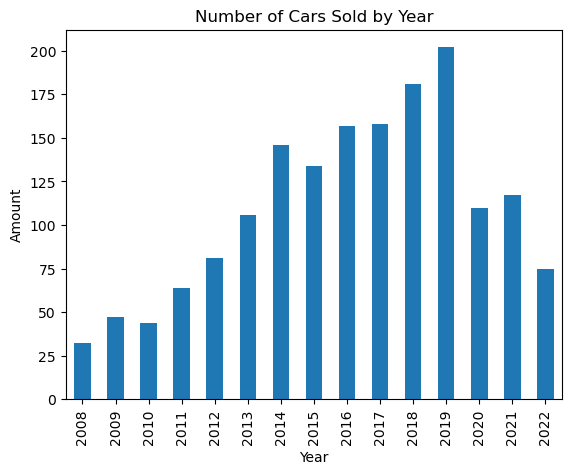

In [25]:
abt["Year"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Cars Sold by Year")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.show()


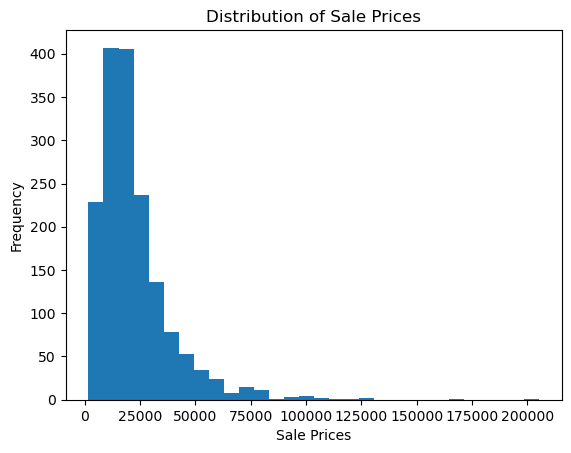

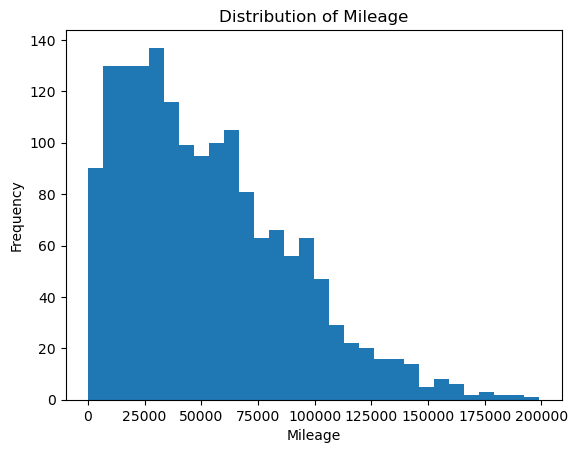

In [26]:
abt["Sale Price"].plot(kind="hist", bins=30)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Prices")
plt.ylabel("Frequency")
plt.show()

abt["Mileage"].plot(kind="hist", bins=30)
plt.title("Distribution of Mileage")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.show()


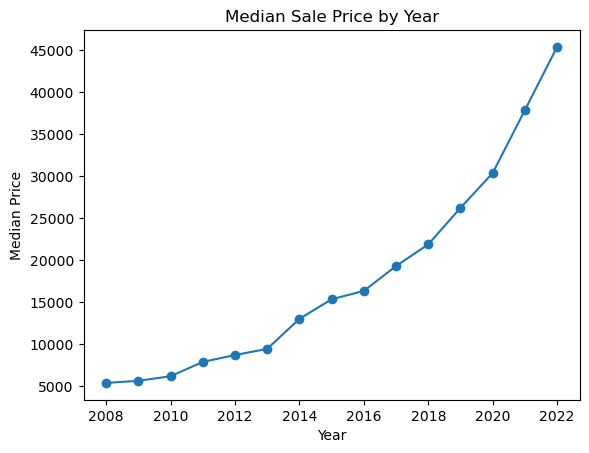

In [27]:
abt.groupby("Year")["Sale Price"].median().plot(kind="line", marker="o")
plt.title("Median Sale Price by Year")
plt.xlabel("Year")
plt.ylabel("Median Price")
plt.show()

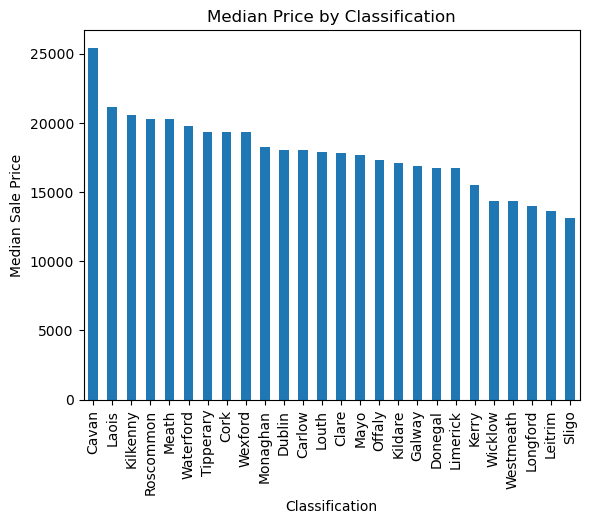

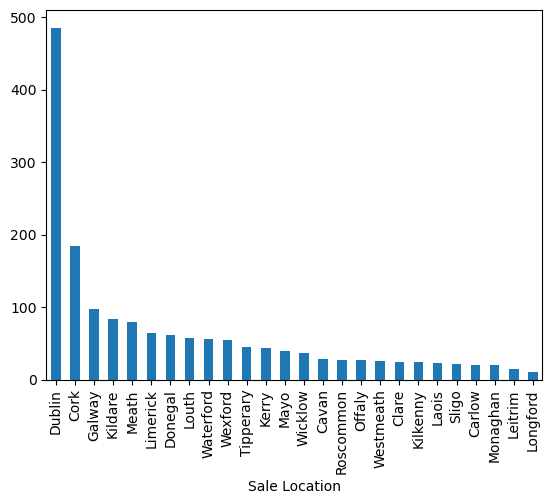

In [28]:
abt.groupby("Sale Location")["Sale Price"].median().sort_values(ascending=False).plot(kind="bar")
plt.title("Median Price by Classification")
plt.xlabel("Classification")
plt.ylabel("Median Sale Price")
plt.show()

abt["Sale Location"].dropna().value_counts().plot.bar()
plt.show()


# Task 3 - 
- Discuss any challenges faced in collecting data.
- Summarise the key insights gained from your
analysis of the data.
- Suggest ideas for further work that could be
conducted on this data.

## Discuss any challenges faced in collecting data.


In data from the from the html and url the data were not formatted properly and has to be standardised to ensure consistency across the dataset:

- Sale price - The currency formatting is inconsistent, some values have decimal in them "€37,132.00". The euro sign in all of the data has to be removed so it is standardised so that it works.
- Date of Sale - Some dates are in ISO/US and some are in the Irish format, I had to change them all to a standard Irish format.
- Mileage - The format for some of the Mileage had the word miles in it and some had commas, we remove these to standardise the data.
- Classification - There were many different variations of the spelling of suv and some mispelling estat instead of estate.
- Transsmission - Unconsistent way of wording e.g there is Auto and Automatic, we changed all of the Auto into Automatic
- Fuel Type - Inconsistent type of fuel type e.g theres "Petrol Plug-In Hybrid" and "Petrol Hybrid", we changed these just to Petrol Hybrid and Disel Hybrid

## Summarise the key insights gained from your analysis of the data.

- Mercedes-Benz has the most cars listed on the website/sold
- The Mercedes-Benz E Class(AMG Line) has the most models sold
- Automatic make up the majority of the cars sold
- Diesel cars are the most sold
- Hatchback is the most sold followed SUV and saloon
- 2019 is the year that most of the cars were sold on
- The distrubition of the cars sold are skews to the left generally under €25,000 and the distrubition of mileage also skews to the left
- The median sale price by year goes up every year favouring newer cars 
- Cavan has the higest median sale price by location
- Dublin has the most sale locations
- Blue is the most sold colour type of the cars that have the colour data

## Suggest ideas for further work that could be conducted on this data.

- We could add in features table and add in the feature of the cars e.g S/S, satnav
- We could add in emission types of some of the cars that have it in the description
- We could check which quarter of the year most of the cars are sold in 